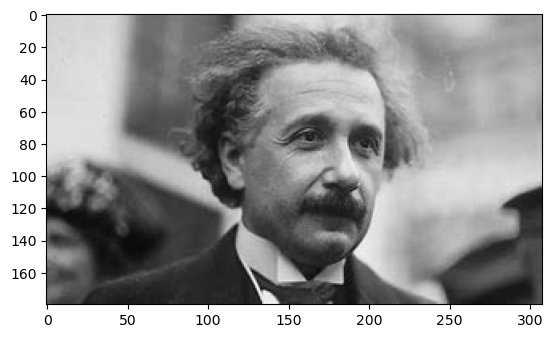

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
img = cv2.imread('image/work1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 查看图片
plt.imshow(img,'gray')

In [15]:
# 查看图片尺寸
img.shape

(180, 308)

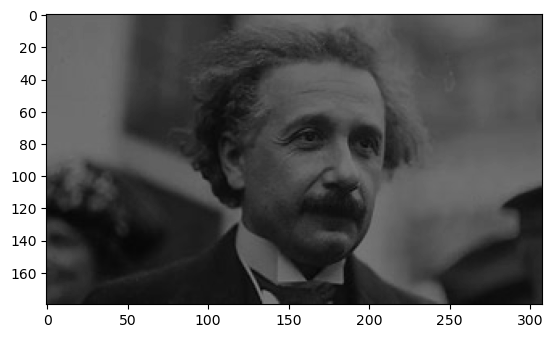

In [17]:
'''
    任务一：线性变换
'''
# 变换1：f = x + 20
img_1 = img + 20
# 变换2：f = x - 20
img_2 = img - 20
# 变换3：f = 2x + 20
img_3 = img * 2.0 + 20
# 变换4：f = 0.5x + 0
img_4 = img * 0.5
# 变换5：f = -x + 255
img_5 = (-1) * img + 255
# 查看图片
plt.imshow(img_4,'gray',vmin=0,vmax=255)

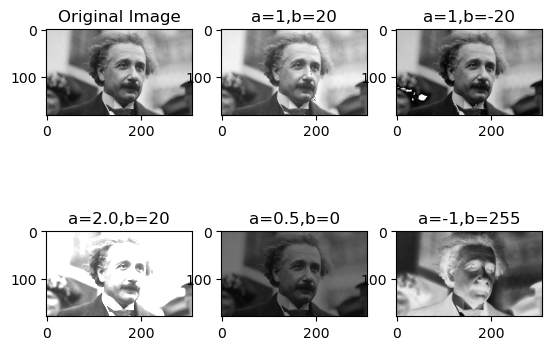

In [19]:
# 图片对比
plt.subplot(2, 3, 1)
plt.imshow(img, 'gray', vmin=0, vmax=255)
plt.title('Original Image')
plt.subplot(2, 3, 2)
plt.imshow(img_1, 'gray', vmin=0, vmax=255)
plt.title('a=1,b=20')
plt.subplot(2, 3, 3)
plt.imshow(img_2, 'gray', vmin=0, vmax=255)
plt.title('a=1,b=-20')
plt.subplot(2, 3, 4)
plt.imshow(img_3, 'gray', vmin=0, vmax=255)
plt.title('a=2.0,b=20')
plt.subplot(2, 3, 5)
plt.imshow(img_4, 'gray', vmin=0, vmax=255)
plt.title('a=0.5,b=0')
plt.subplot(2, 3, 6)
plt.imshow(img_5, 'gray', vmin=0, vmax=255)
plt.title('a=-1,b=255')
plt.show()

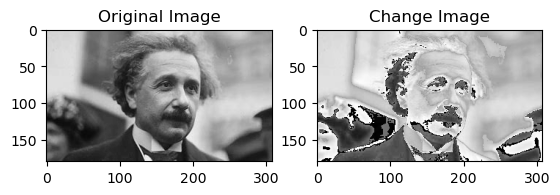

In [21]:
'''
    分段线性变换
'''
c = 255
b = 20
a = 2.0

f3 = 255
f2 = 40
f1 = 55

img_change = np.zeros_like(img)

for row in range(len(img)):
    for col in range(len(img[row])):
        if img[row][col] < 60:
            img_change[row][col] = a * img[row][col]
        elif 60 <= img[row][col] < 150:
            img_change[row][col] = (f2 - f1) * (img[row][col] - a) / (b - a) + f1
        elif 150 <= img[row][col] < 255:
            img_change[row][col] = (f3 - f2) * (img[row][col] - b) / (c - b) + f2

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_change, cmap='gray')
plt.title('Change Image')
plt.show()

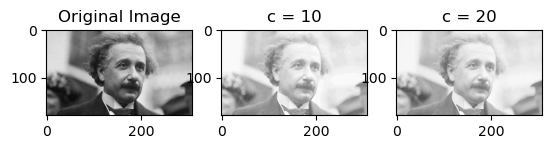

In [22]:
'''
    对数变换
'''

# 对数变换公式
def log(c, img):
    img_log = c * np.log(1.0 + img)
    img_log = np.uint8(img_log + 0.5)
    return img_log

# 实例
img_log1 = log(10.0, img)
img_log2 = log(20.0, img)

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(img_log1, cmap='gray')
plt.title('c = 10')
plt.subplot(1, 3, 3)
plt.imshow(img_log2, cmap='gray')
plt.title('c = 20')
plt.show()

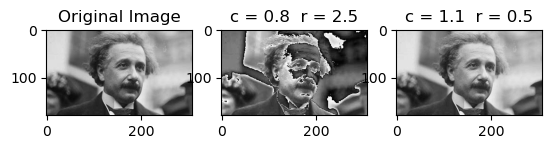

In [23]:
'''
    幂变换
'''

# 幂变换公式
def gamma(c, r, img):
    img_gamma = np.zeros_like(img)
    for row in range(len(img)):
        for col in range(len(img[row])):
            img_gamma[row][col] = c * img[row][col] ** r
    img_gamma = np.uint8(img_gamma + 0.5)
    return img_gamma

# 实例
img_gamma1 = gamma(1.0, 1.1, img)
img_gamma2 = gamma(1.0, 0.8, img)

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(img_gamma1, cmap='gray')
plt.title('c = 0.8  r = 2.5')
plt.subplot(1, 3, 3)
plt.imshow(img_gamma2, cmap='gray')
plt.title('c = 1.1  r = 0.5')
plt.show()